In [18]:
import numpy as np
import pandas as pd
import scipy as sc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
BMF_1989 = pd.read_csv("BMF_1989_cleaned.csv")
BMF_2015 = pd.read_csv("BMF_2015_cleaned.csv")
OA = pd.read_csv("Opp_At_cleaned.csv")

In [3]:
OA.head()

,city,state_abbr,kir_natam_female_n,kir_natam_female_sum,jail_natam_female_n,jail_natam_female_sum,kfr_natam_female_n,kfr_natam_female_sum,kfr_top20_natam_female_n,kfr_top20_natam_female_sum,...,kir_24_white_pooled_mean,marr_26_white_pooled_mean,marr_29_white_pooled_mean,kfr_29_white_pooled_mean,kir_29_white_pooled_mean,marr_32_white_pooled_mean,work_32_white_pooled_mean,work_26_white_pooled_mean,work_29_white_pooled_mean,work_24_white_pooled_mean
0,Abbeville,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.482208,0.445968,0.526599,0.527224,0.494739,0.558693,0.768963,0.827629,0.784216,0.830276
1,Abbeville,GA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.479642,0.340178,0.469560,0.466506,0.451268,0.559679,0.683883,0.776876,0.733919,0.767494
2,Abbeville,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.476599,0.410694,0.501098,0.577534,0.535558,0.522310,0.766848,0.817907,0.786183,0.818319
3,Abbeville,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.414211,0.431940,0.534298,0.477329,0.430956,0.483370,0.722666,0.719545,0.707353,0.705117
4,Abbeville,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.544885,0.443972,0.577350,0.541583,0.492280,0.590251,0.789484,0.830978,0.768581,0.847553


In [37]:
###########################
### Dimension Reduction ###
###########################
OA_0 = OA.fillna(0)

OA_feat = pd.Series([x for x in OA.columns if ("mean" in x) | (("_n" in x) & ("sum" not in x))])


OA_x = OA_0[OA_feat].values


OA_x = StandardScaler().fit_transform(OA_x)

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(OA_x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4'])

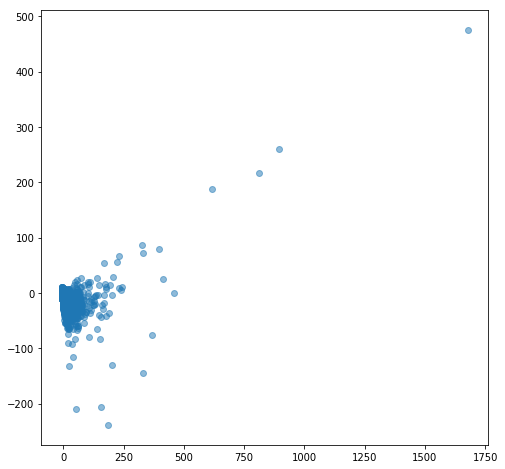

In [41]:
fig = plt.figure(figsize = (8,8));
plt.scatter(principalDf['pc1'], principalDf['pc2'], alpha = .5);

In [40]:
pca.explained_variance_ratio_

array([ 0.31228978,  0.10374043,  0.09525002,  0.06673864])